In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

raw_data = pd.read_csv('../data/2021-SxS-Data-and-Data-Info/partial_cleaned_2021.csv')
raw_data.drop(columns='Unnamed: 0', inplace= True)
raw_data.head()

,state,division,region,gender,age_group,ethnicity,ed_lvl,marital_stat,lvng_arr,marital_stat_v2,...,10k_expense,10k_gift,expect_inheritance,num_cred_cards,health_ins,skipped_med,fin_conf_lvl,math_conf_lvl,knowledge_conf_lvl,fin_ed
0,South Carolina,South Atlantic,South,female,25-34,white,Bachelors,married,2,married,...,1,1,1,2,1,2,7,6,6,2
1,Ohio,East North Central,Midwest,female,25-34,white,Bachelors,divorced,1,single,...,2,2,2,7,1,2,1,1,2,2
2,Arizona,Mountain,West,male,65+,white,Bachelors,divorced,1,single,...,2,2,2,3,1,2,7,7,6,2
3,Arizona,Mountain,West,female,45-54,non-white,HS Grad,married,2,married,...,2,2,2,2,1,2,7,6,5,3
4,Ohio,East North Central,Midwest,female,45-54,white,GED,divorced,1,single,...,2,2,98,7,1,2,6,6,5,3


In [2]:
combined_df = raw_data[['state','region','math_conf_lvl','fin_sat_lvl','fin_conf_lvl', 'ed_lvl', 'caregiver_ed_lvl', 'hh_ann_inc']]
# Replace all 99 &98 answers with none in columns & drop them since it skews mean
combined_df.loc[combined_df['math_conf_lvl'] == 99, 'math_conf_lvl'] = None
combined_df.loc[combined_df['fin_sat_lvl'] == 99, 'fin_sat_lvl'] = None
combined_df.loc[combined_df['fin_conf_lvl'] == 99, 'fin_conf_lvl'] = None
combined_df.loc[combined_df['math_conf_lvl'] == 98, 'math_conf_lvl'] = None
combined_df.loc[combined_df['fin_sat_lvl'] == 98, 'fin_sat_lvl'] = None
combined_df.loc[combined_df['fin_conf_lvl'] == 98, 'fin_conf_lvl'] = None
combined_df = combined_df.dropna()

Text(0.5, 1.0, 'State Average Distribution')

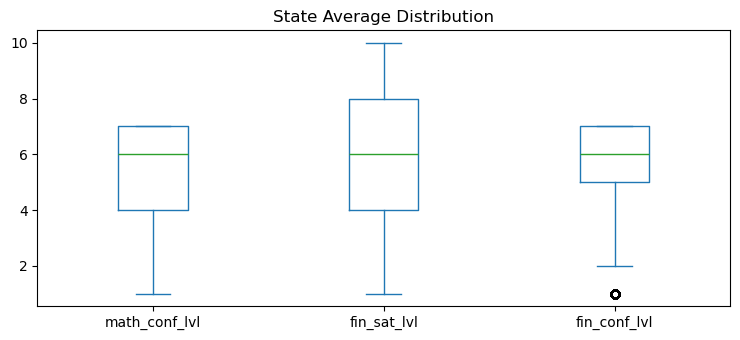

In [16]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
#Plot Graph
ax = combined_df[['math_conf_lvl','fin_sat_lvl', 'fin_conf_lvl']].plot(kind='box')
ax.set_title('State Average Distribution')


In [22]:
plt.rcParams["figure.autolayout"] = True
ax = combined_df.groupby('state')['ed_lvl'].value_counts().plot(
            kind = 'bar'
)

state    ed_lvl             
Alabama  some college           131
         HS Grad                 98
         Bachelors               85
         Associates              52
         GED                     51
                               ... 
Wyoming  HS Grad                 75
         Associates              71
         Post Grad               57
         GED                     25
         did not complete HS     12
Name: count, Length: 357, dtype: int64